# Script de visualisation des données

In [286]:
import os
import pandas as pd
import geopandas as gpd
import seaborn as sns

# Set the working directory
prod_dir = "../../PROD/geo/"
subfold_com = "filo_com"

communes = gpd.read_file(os.path.join(prod_dir, "admin", "communes_2024.shp"))
communes = communes[["label", "official_c", "geometry"]]
communes['surf_com'] = communes.area / 10**6
communes = communes[["official_c", "surf_com"]]

## Quelles sont les territoires les plus exposés ?
Analyse par : 
- Commune
- Interco
- PLUi/SCOT
- QPV

In [290]:
summary = pd.read_csv(os.path.join(prod_dir, "lcz/summary_tot_lcz_filo_psdovol.csv"))
summary["official_c"] = summary["official_c"].astype(str).str.zfill(5)
communes["official_c"] = communes["official_c"].astype(str).str.zfill(5)
len_b = len(summary)
summary = summary.merge(communes, on="official_c", how="left")
print(len_b==len(summary))
# # On créée 4 catégories de LCZ
summary["category"] = summary["lcz"].apply(lambda x: "compact" if x in ["1","2","3"] else "spaced" if x in ["4","5","6","9"] else "open" if x in ["A","B","C","D","F","G"] else "impermeable" if x in ["8","E"] else "error")

True


/var/folders/pl/xywgn7qd4sv_s094vn5h3dtr0000gn/T/ipykernel_54315/3601893262.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv(os.path.join(prod_dir, "lcz/summary_tot_lcz_filo_psdovol.csv"))


In [291]:
summary[summary["label"]=="Levallois-Perret"]

,lcz,official_c,surf_com_official,surf_lcz_group_com,surf_id_filo,label,ind_w,men_w,men_pauv_w,men_1ind_w,...,ind_11_17_w,ind_18_24_w,ind_25_39_w,ind_40_54_w,ind_55_64_w,ind_65_79_w,ind_80p_w,ind_inc_w,surf_com,category
33619,1,92044,2.416354,0.020971,0.020805,Levallois-Perret,979.478223,437.635481,57.807547,176.216248,...,91.741737,76.848376,151.103650,189.313825,119.318499,185.550521,64.244177,0.834974,2.416354,compact
33690,2,92044,2.416354,0.889559,0.889134,Levallois-Perret,40192.434955,18913.840863,1911.534533,8322.505572,...,2953.472958,2758.425317,11032.465304,8108.340893,3784.225882,4020.137349,1592.534534,26.133705,2.416354,compact
33882,3,92044,2.416354,0.016537,0.016537,Levallois-Perret,484.213798,248.523614,26.647312,127.652811,...,31.558195,28.661355,145.184191,97.586215,42.934322,47.375864,23.475158,0.242539,2.416354,compact
33999,4,92044,2.416354,0.018925,0.018925,Levallois-Perret,718.205139,298.707920,27.628476,101.071566,...,61.414668,51.493733,134.048718,140.974351,76.789457,111.163293,33.917862,0.501717,2.416354,spaced
34377,5,92044,2.416354,0.637385,0.616512,Levallois-Perret,16240.851175,7108.765093,814.025903,2775.532513,...,1356.570634,1154.508597,3676.148585,3243.402910,1704.989529,1937.134861,682.050380,118.928893,2.416354,spaced
35201,6,92044,2.416354,0.014556,0.014556,Levallois-Perret,234.852367,109.118101,13.363635,46.188452,...,20.427333,16.393653,63.868356,50.052160,21.665443,17.401734,6.688038,0.053099,2.416354,spaced
35871,8,92044,2.416354,0.240028,0.240028,Levallois-Perret,5660.941930,2575.221385,172.616512,1052.488596,...,414.324490,402.318935,1463.871602,1172.879832,553.507411,540.111189,234.367414,1.702975,2.416354,impermeable
37105,9,92044,2.416354,0.055734,0.037590,Levallois-Perret,178.424492,71.204894,9.047326,21.933740,...,13.950458,13.469129,36.224204,37.312662,19.136770,22.364022,7.675408,0.843664,2.416354,spaced
38503,A,92044,2.416354,0.013842,0.013842,Levallois-Perret,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.416354,open
42958,E,92044,2.416354,0.383757,0.348305,Levallois-Perret,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.416354,impermeable


In [289]:
summary.head()

,lcz,official_c,surf_com_official,surf_lcz_group_com,surf_id_filo,label,ind_w,men_w,men_pauv_w,men_1ind_w,...,ind_11_17_w,ind_18_24_w,ind_25_39_w,ind_40_54_w,ind_55_64_w,ind_65_79_w,ind_80p_w,ind_inc_w,surf_com,category
0,2,76341,4.221349,0.002722,0.002722,Harfleur,84.463759,41.693489,9.568110,17.705485,...,7.318996,10.069817,19.954999,13.401567,6.906988,10.174029,2.428110,0.000000,4.221349,compact
1,2,76351,53.226521,0.658408,0.635790,Le Havre,12124.607625,6929.187817,1308.987950,3863.016566,...,890.190326,1183.026863,2863.728057,2311.995181,1310.419868,1563.841921,699.987164,9.366974,53.226521,compact
2,2,76447,19.050934,0.005800,0.005800,Montivilliers,91.555705,50.285054,4.579210,23.723254,...,7.099619,13.306122,19.893143,17.274283,7.750267,10.357735,7.524613,0.000000,19.050934,compact
3,2,76647,11.766195,0.002214,0.002214,Saint-Romain-de-Colbosc,54.530912,26.734838,3.357211,11.127223,...,6.863916,2.910801,12.712159,10.328635,4.858176,5.526756,3.208753,0.000000,11.766195,compact
4,3,76254,4.149278,0.009927,0.009927,Étretat,56.559999,32.756103,4.701142,17.569227,...,4.109780,4.735026,6.336458,11.522905,9.353143,11.758178,4.288311,0.000000,4.149278,compact


In [292]:
# On conduit nos analyses à l'échelles de la catégorie et de la commune
summary_categ = summary.drop(columns=["lcz"]).groupby(["official_c","label","category","surf_id_filo","surf_lcz_com","surf_lcz_id_com"]).sum().reset_index()  
# On calcule la superficie totale d'une commune
summary_categ["surf_com_id_filo"] = summary_categ.groupby('official_c')['surf_id_filo'].transform('sum')
# # On calcule la surface de la commune couverte par la catégorisation LCZ
summary_categ["prop_lcz"] = ((summary_categ["surf_lcz_com"] )/summary_categ["surf_com"]) 

# # H : On supprime les communes qui ont moins de 60% de leur surface couverte par la catégorisation LCZ/FILO
summary_categ = summary_categ[summary_categ["prop_lcz"] > 0.6]

# On calcule la proportion de chaque catégorie de LCZ dans une commune
summary_categ["prop_cat"] = summary_categ["surf_lcz_id_com"] / summary_categ["surf_com"]
# On calcule le rang de chaque commune par catégorie de LCZ
summary_categ["rank_prop_cat"] = summary_categ.groupby('category')['prop_cat'].rank(ascending=False)
# On calcule le rang de chaque commune par catégorie de LCZ
summary_categ["rank_surf_cat"] = summary_categ.groupby('category')['surf_id_filo'].rank(ascending=False)



KeyError: 'surf_lcz_com'

In [283]:
# Les communes avec la part d'espace compact la plus importante
summary_categ[(summary_categ["category"]=="compact")&(summary_categ["rank_prop_cat"]<20)].filter(items=["official_c","label","prop_cat","rank_prop_cat","surf_id_filo","rank_surf_cat","prop_lcz"]).sort_values(by="rank_prop_cat")

,official_c,label,prop_cat,rank_prop_cat,surf_id_filo,rank_surf_cat,prop_lcz
98160,92044,Levallois-Perret,1.039706,1.0,0.889134,28.0,1.000000
80138,75056,Paris,0.982466,2.0,33.305785,1.0,1.000000
99141,94080,Vincennes,0.641229,3.0,0.412854,62.0,1.000000
98197,92049,Montrouge,0.629429,4.0,0.442024,57.0,1.000000
98593,93061,Le Pré-Saint-Gervais,0.527733,5.0,0.108708,185.0,1.000000
98027,92012,Boulogne-Billancourt,0.461435,6.0,0.958481,23.0,1.000000
99032,94067,Saint-Mandé,0.459477,7.0,0.149096,148.0,1.000000
98483,93045,Les Lilas,0.435633,8.0,0.189442,126.0,1.000000
53915,59332,Lannoy,0.414374,9.0,0.033490,463.0,1.000000
98078,92024,Clichy,0.407202,10.0,0.421794,60.0,1.000000


In [114]:
# Les communes avec la part d'espace compact la plus importante
lcz_com_clean[lcz_com_clean["rnk_shr_compact"]<20].filter(items=["official_c","label","shr_compact","compact","rnk_shr_compact"]).sort_values(by="rnk_shr_compact")

,official_c,label,shr_compact,compact,rnk_shr_compact
11187,92044,Levallois-Perret,0.383663,0.927067,1.0
9104,75056,Paris,0.321521,33.898621,2.0
11232,93061,Le Pré-Saint-Gervais,0.261142,0.183492,3.0
11191,92049,Montrouge,0.232519,0.481918,4.0
11290,94080,Vincennes,0.220650,0.420097,5.0
11221,93045,Les Lilas,0.214991,0.270319,6.0
6099,59332,Lannoy,0.181026,0.033490,7.0
11278,94067,Saint-Mandé,0.164613,0.149096,8.0
11173,92012,Boulogne-Billancourt,0.163002,1.002929,9.0
6199,59512,Roubaix,0.160787,2.119250,10.0


In [115]:
# Les communes avec la surface compact la plus importante
lcz_com_clean[lcz_com_clean["rnk_compact"]<20].filter(items=["official_c","label","compact","rnk_compact"]).sort_values(by="rnk_compact")

,official_c,label,compact,rnk_compact
9104,75056,Paris,33.898621,1.0
3402,33063,Bordeaux,7.423105,2.0
840,13055,Marseille,7.107514,3.0
8408,69123,Lyon,4.851891,4.0
6110,59350,Lille,4.454677,5.0
3305,31555,Toulouse,3.246538,6.0
349,06088,Nice,2.575800,7.0
6199,59512,Roubaix,2.119250,8.0
4582,42218,Saint-Étienne,1.984387,9.0
8075,67482,Strasbourg,1.837795,10.0


In [117]:
# Les communes avec la part d'espace ouvert la moins importante
lcz_com_clean[len(lcz_com_clean)-lcz_com_clean["rnk_shr_open"]<20].filter(items=["official_c","label","shr_open","open","rnk_shr_open"]).sort_values(by="rnk_shr_open",ascending=False) 

,official_c,label,shr_open,open,rnk_shr_open
11174,92014,Bourg-la-Reine,0.000000,0.000000,11473.5
6099,59332,Lannoy,0.000000,0.000000,11473.5
11191,92049,Montrouge,0.001434,0.002972,11472.0
11201,92075,Vanves,0.003966,0.006165,11471.0
11278,94067,Saint-Mandé,0.004310,0.003904,11470.0
11290,94080,Vincennes,0.006389,0.012164,11469.0
11184,92035,La Garenne-Colombes,0.006822,0.012150,11468.0
11215,93029,Drancy,0.007612,0.059118,11467.0
11172,92009,Bois-Colombes,0.010392,0.020043,11466.0
9898,78311,Houilles,0.010477,0.046908,11465.0


In [118]:
# Les communes avec la part d'espace imperméable la plus importante
lcz_com_clean[lcz_com_clean["rnk_shr_impermeable"]<20].filter(items=["official_c","label","shr_impermeable","impermeable","rnk_shr_impermeable"]).sort_values(by="rnk_shr_impermeable")

,official_c,label,shr_impermeable,impermeable,rnk_shr_impermeable
11318,95088,Bonneuil-en-France,0.816258,3.885552,1.0
11185,92036,Gennevilliers,0.678385,7.893859,2.0
11249,94011,Bonneuil-sur-Marne,0.655630,3.602989,3.0
11216,93030,Dugny,0.641969,2.488870,4.0
11277,94065,Rungis,0.608294,2.554275,5.0
11255,94021,Chevilly-Larue,0.571330,2.413878,6.0
11204,92078,Villeneuve-la-Garenne,0.541755,1.735222,7.0
8444,69199,Saint-Fons,0.531291,3.199701,8.0
11211,93013,Le Bourget,0.524535,1.091058,9.0
11443,95572,Saint-Ouen-l'Aumône,0.512799,7.182153,10.0


In [73]:
# Les communes avec la surface d'espace imperméable la plus importante
lcz_com_clean[lcz_com_clean["rnk_impermeable"]<20].filter(items=["official_c","label","shr_impermeable","impermeable","rnk_impermeable"]).sort_values(by="rnk_impermeable")

,official_c,label,shr_impermeable,impermeable,rnk_impermeable
9104,75056,Paris,0.580523,61.205700,1.0
3305,31555,Toulouse,0.352987,41.683318,2.0
840,13055,Marseille,0.168142,40.075187,3.0
349,06088,Nice,0.335760,24.778407,4.0
8075,67482,Strasbourg,0.297585,23.248651,5.0
3402,33063,Bordeaux,0.437863,21.757117,6.0
827,13039,Fos-sur-Mer,0.240602,21.068237,7.0
4724,44109,Nantes,0.307452,20.185772,8.0
9247,76351,Le Havre,0.377331,20.033163,9.0
7818,66136,Perpignan,0.281473,19.173097,10.0


Typologie de commune ?

## Quelles sont les caractéristiques sociales des zones les plus impactés ?
- Quelle nombre de personnes habite dans les LCZ les plus exposées ?
- Quelle moyenne d'âge ?
- Quel niveau de revenus moyen ?
- Quelle différence avec les autres LCZ ?

In [260]:
summary = pd.read_csv(os.path.join(prod_dir, "LCZ/summary_tot_lcz_filo_psdovol.csv"))
summary["category"] = summary["lcz"].apply(lambda x: "compact" if x in ["1","2","3"] else "spaced" if x in ["4","5","6","9"] else "open" if x in ["A","B","C","D","F","G"] else "impermeable" if x in ["8","E"] else "error")

/var/folders/pl/xywgn7qd4sv_s094vn5h3dtr0000gn/T/ipykernel_54315/837642197.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv(os.path.join(prod_dir, "LCZ/summary_tot_lcz_filo_psdovol.csv"))


In [261]:
# Nombre d'habitants dans la base de données
summary.filter(items=["ind_w"]).sum()
# On calcule la densité de chaque catégorie de LCZ dans une commune
summary_categ["dens_cat"] = summary_categ["ind_w"] / summary_categ["surf_id_filo"]

<Axes: xlabel='category'>

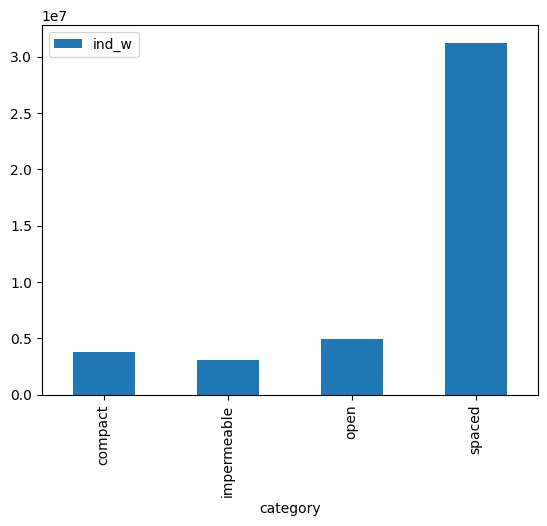

In [262]:
# Nombre de personnes à l'échelle nationale dans les LCZ les plus exposées 
summary.filter(items=["ind_w","category"]).groupby("category").sum().plot(kind="bar")

In [110]:
summary[summary["label"]=="Lille"].filter(items=["ind_w","category"]).groupby("category").sum()

,ind_w
category,
compact,61562.964813
impermeable,21055.116244
open,34.286930
spaced,108716.515820


<Axes: xlabel='category'>

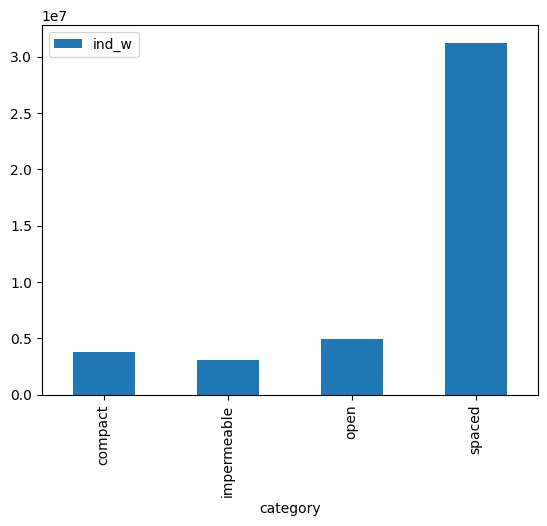

In [87]:
summary.filter(items=["category","ind_w"]).groupby("category").sum().plot(kind="bar")

## Quelle est la probabilité d'être exposé selon son statut :
- propriétaire / locataire
- âge
- niveau de vie moyen du ménage dans le carreau


Analyse de sensibilité à partir de l'IRIS


Calculer les proportions de chaque catégorie dans le polygone / permet d'avoir des probabilités locales en fonction du type de LCZ. 

Comment on pondère à l'échelle agrégée ? Sans pondération, puisque l'espace est distribué de manière homogène

## Quelle est l'évolution du niveau de vie dans les lieux les plus exposés ?
Idéalement regarder depuis 2003 / Voir pour des RDD ?

## Quelle est la nature des bâtiments dans les zones exposées ? 
- Âge
- DPE
- Usage résidentiel / tertiaire ?